In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import base64
import seaborn as sns
import urllib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Matplotlib is building the font cache; this may take a moment.


In [7]:
file_path = r'P:\project data engineer\improved_customer_data.csv'
combined_df = pd.read_csv(file_path)
combined_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,32,Male,46,7,3,7,Standard,Annual,289.81,25,1
1,2,25,Male,40,9,2,11,Standard,Annual,748.27,24,0
2,3,56,Male,1,16,4,7,Basic,Annual,646.24,8,0
3,4,22,Female,43,18,2,18,Premium,Monthly,645.70,30,1
4,5,30,Male,11,20,5,27,Basic,Quarterly,241.48,4,1


In [8]:
#Displays the last few rows
combined_df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
499995,499996,45,Male,53,8,9,12,Standard,Monthly,887.51,27,0
499996,499997,52,Female,29,16,4,0,Standard,Monthly,181.78,20,0
499997,499998,50,Female,23,4,9,5,Standard,Monthly,829.47,9,1
499998,499999,46,Female,29,4,5,2,Basic,Monthly,710.37,11,1
499999,500000,56,Female,8,21,4,7,Standard,Annual,845.49,26,1


In [10]:
#Summary of the dataset, including column data types and non-null counts
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         500000 non-null  int64  
 1   Age                500000 non-null  int64  
 2   Gender             500000 non-null  object 
 3   Tenure             500000 non-null  int64  
 4   Usage Frequency    500000 non-null  int64  
 5   Support Calls      500000 non-null  int64  
 6   Payment Delay      500000 non-null  int64  
 7   Subscription Type  500000 non-null  object 
 8   Contract Length    500000 non-null  object 
 9   Total Spend        500000 non-null  float64
 10  Last Interaction   500000 non-null  int64  
 11  Churn              500000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 45.8+ MB


In [11]:
# Check for missing values in each column
print(combined_df.isnull().sum())

# Remove rows with any missing values
combined_df.dropna(inplace=True)
print('-----------')
#Checking that nulls are removed
print(combined_df.isnull().sum())

# Check the updated DataFrame
combined_df.shape


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
-----------
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


(500000, 12)

In [12]:
#get the dimensions of a DataFrame
combined_df.shape

(500000, 12)

In [14]:
df_cleaned = combined_df.dropna()

In [15]:
#Provides summary statistics for numerical columns
combined_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,250000.500000,40.518066,30.025648,16.984494,4.998376,15.014324,550.718580,15.496162,0.500508
std,144337.711634,11.538744,17.581287,7.787315,3.163895,8.939769,259.916899,8.656607,0.500000
min,1.000000,21.000000,0.000000,4.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,125000.750000,31.000000,15.000000,10.000000,2.000000,7.000000,325.640000,8.000000,0.000000
50%,250000.500000,41.000000,30.000000,17.000000,5.000000,15.000000,551.290000,15.000000,1.000000
75%,375000.250000,51.000000,45.000000,24.000000,8.000000,23.000000,776.130000,23.000000,1.000000
max,500000.000000,60.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [16]:
# Check for duplicate rows
print(combined_df.duplicated().sum())

0


In [17]:
# Columns to check for outliers
data_num= combined_df[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']]
q1 = data_num.quantile(0.25)
q3 = data_num.quantile(0.75)
IQR = q3 - q1
outliers = (data_num < (q1 - 1.5 * IQR)) | (data_num > (q3 + 1.5 * IQR))
# print(outliers.sum())
print(outliers)

          Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       False   False            False          False          False   
1       False   False            False          False          False   
2       False   False            False          False          False   
3       False   False            False          False          False   
4       False   False            False          False          False   
...       ...     ...              ...            ...            ...   
499995  False   False            False          False          False   
499996  False   False            False          False          False   
499997  False   False            False          False          False   
499998  False   False            False          False          False   
499999  False   False            False          False          False   

        Total Spend  
0             False  
1             False  
2             False  
3             False  
4             False  
...

In [18]:
#showing the quartiles and more details about data_num
print(data_num.describe())

                 Age         Tenure  Usage Frequency  Support Calls  \
count  500000.000000  500000.000000    500000.000000  500000.000000   
mean       40.518066      30.025648        16.984494       4.998376   
std        11.538744      17.581287         7.787315       3.163895   
min        21.000000       0.000000         4.000000       0.000000   
25%        31.000000      15.000000        10.000000       2.000000   
50%        41.000000      30.000000        17.000000       5.000000   
75%        51.000000      45.000000        24.000000       8.000000   
max        60.000000      60.000000        30.000000      10.000000   

       Payment Delay    Total Spend  
count  500000.000000  500000.000000  
mean       15.014324     550.718580  
std         8.939769     259.916899  
min         0.000000     100.000000  
25%         7.000000     325.640000  
50%        15.000000     551.290000  
75%        23.000000     776.130000  
max        30.000000    1000.000000  


In [19]:
# Visualizaion with Python(Numpy,Pandas, Matplotlib,Seaborn)


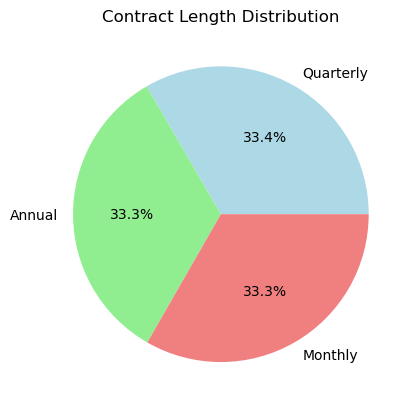

In [20]:
contract_length_counts = combined_df['Contract Length'].value_counts()

# Plotting a pie chart
plt.pie(contract_length_counts, labels=contract_length_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Contract Length Distribution')
plt.show()

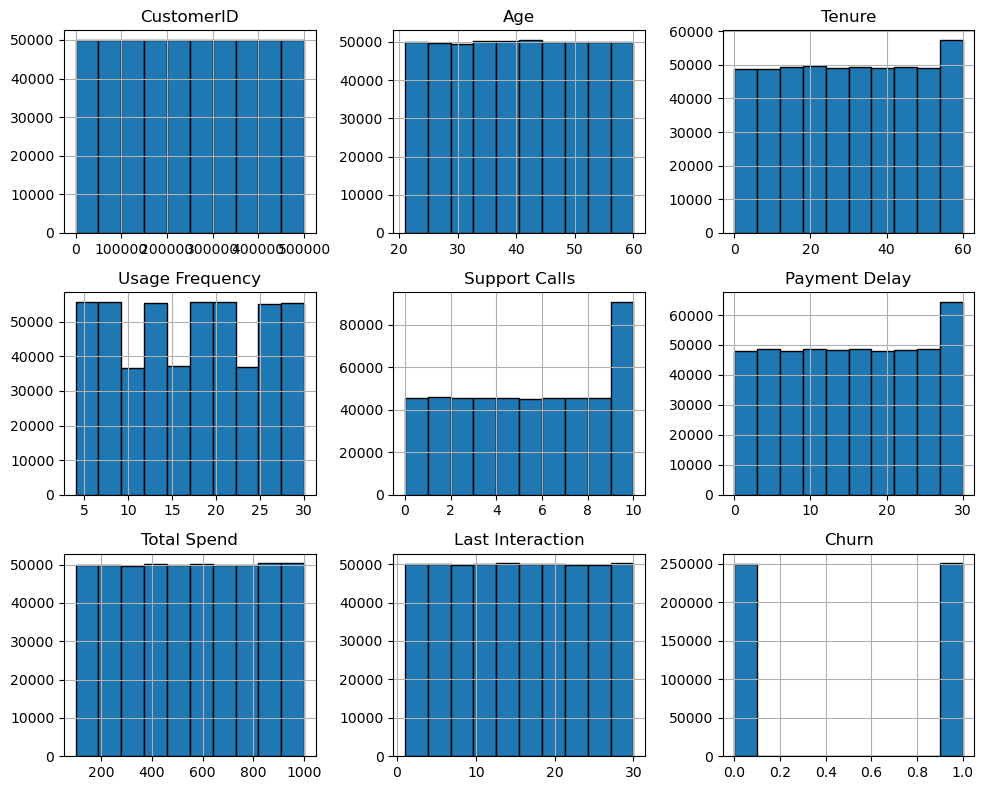

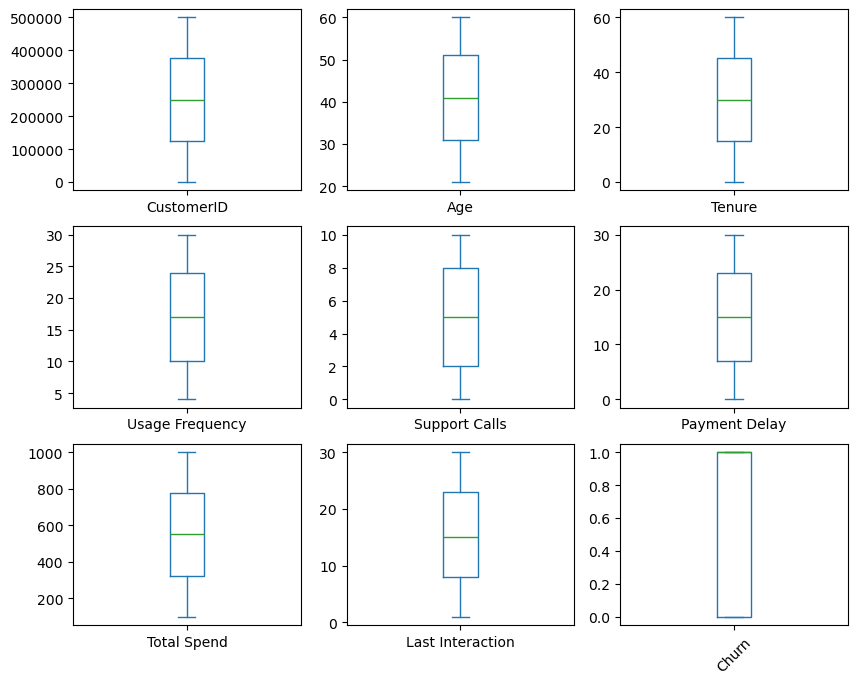

In [21]:
# Data Distribution by Histogram for numerical features
combined_df.hist(figsize=(10, 8),edgecolor='black')
plt.tight_layout()
plt.show()

# Box plot for numerical features
combined_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 8))
plt.xticks(rotation=45)
plt.show()

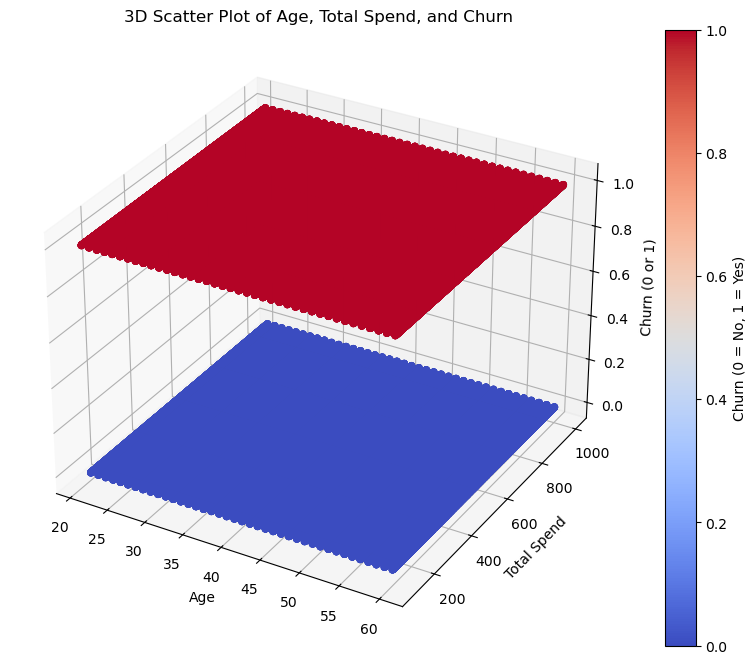

In [22]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = combined_df['Age']
y = combined_df['Total Spend']
z = combined_df['Churn']

# Color by churn value
scatter = ax.scatter(x, y, z, c=z, cmap='coolwarm', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Total Spend')
ax.set_zlabel('Churn (0 or 1)')
plt.title('3D Scatter Plot of Age, Total Spend, and Churn')

# Add color bar
fig.colorbar(scatter, ax=ax, label='Churn (0 = No, 1 = Yes)')

plt.show()

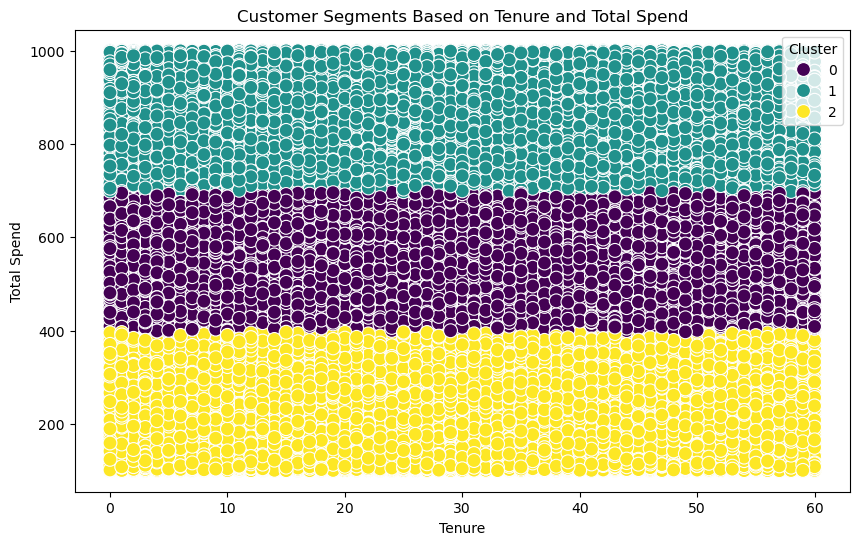

Cluster
0    0.500423
1    0.501075
2    0.500012
Name: Churn, dtype: float64


In [23]:
# Prepare the data for clustering
X = combined_df[['Tenure', 'Total Spend']]

# Apply K-Means clustering (choose the number of clusters, e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=0)
combined_df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters using scatter plots
plt.figure(figsize=(10, 6))

# Scatter plot with clusters highlighted
sns.scatterplot(x='Tenure', y='Total Spend', hue='Cluster', data=combined_df, palette='viridis', s=100)

plt.title('Customer Segments Based on Tenure and Total Spend')
plt.xlabel('Tenure')
plt.ylabel('Total Spend')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Analyze churn behavior by cluster
# Calculate churn rate in each cluster
cluster_churn_rate = combined_df.groupby('Cluster')['Churn'].mean()

# Print churn rate per cluster
print(cluster_churn_rate)

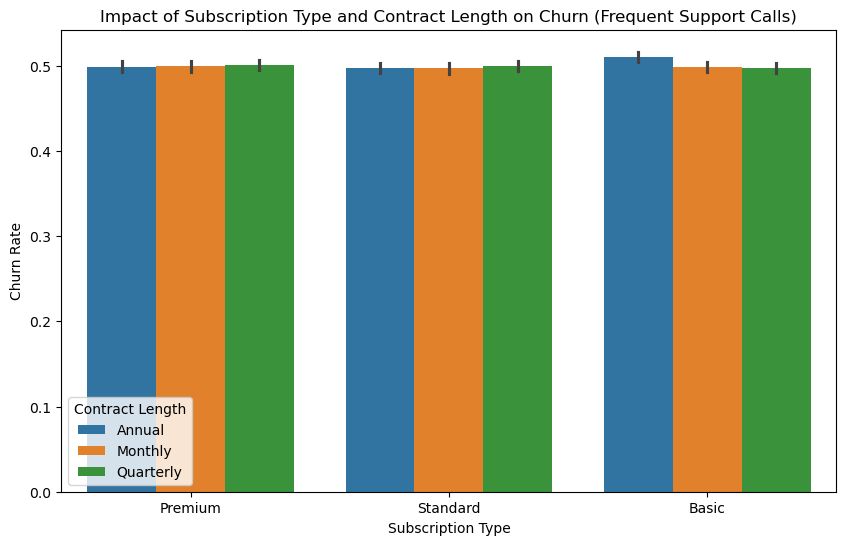

In [24]:
# Define frequent support calls based on a threshold (e.g., more than 5 support calls)
combined_df['Frequent Support Calls'] = combined_df['Support Calls'] > 5
# Create a plot for customers with frequent support calls only
df_frequent_support = combined_df[combined_df['Frequent Support Calls'] == True]

# Set the figure size
plt.figure(figsize=(10,6))

# Create a nested bar plot
sns.barplot(data=df_frequent_support,
            x='Subscription Type',
            y='Churn',
            hue='Contract Length')

# Add labels and title
plt.title("Impact of Subscription Type and Contract Length on Churn (Frequent Support Calls)")
plt.xlabel("Subscription Type")
plt.ylabel("Churn Rate")
plt.legend(title="Contract Length")

# Show the plot
plt.show()

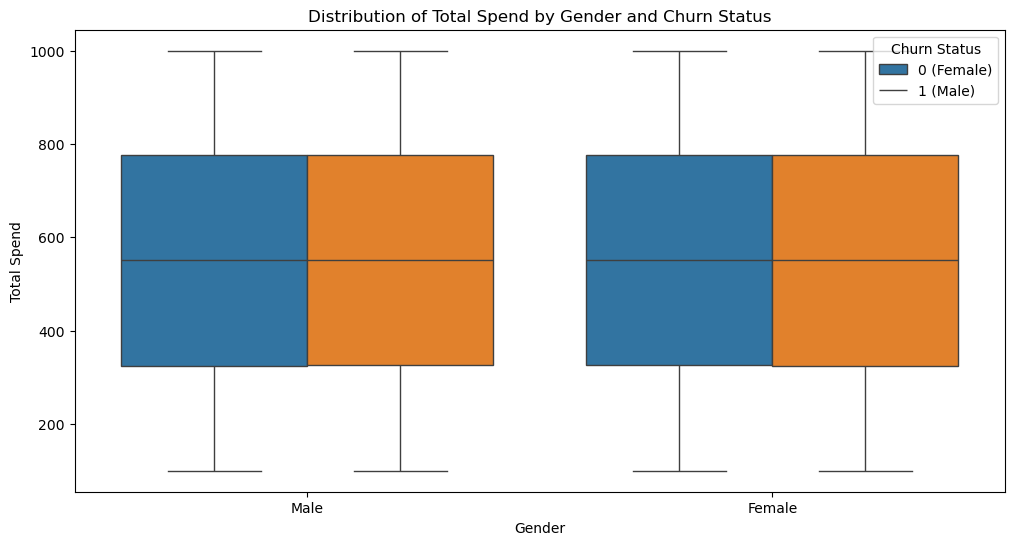

In [25]:
#What is the distribution of total spend by gender and churn status?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Total Spend', hue='Churn', data=combined_df)
plt.title('Distribution of Total Spend by Gender and Churn Status')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
plt.legend(title='Churn Status', labels=['0 (Female)', '1 (Male)'], loc='upper right')
plt.show()

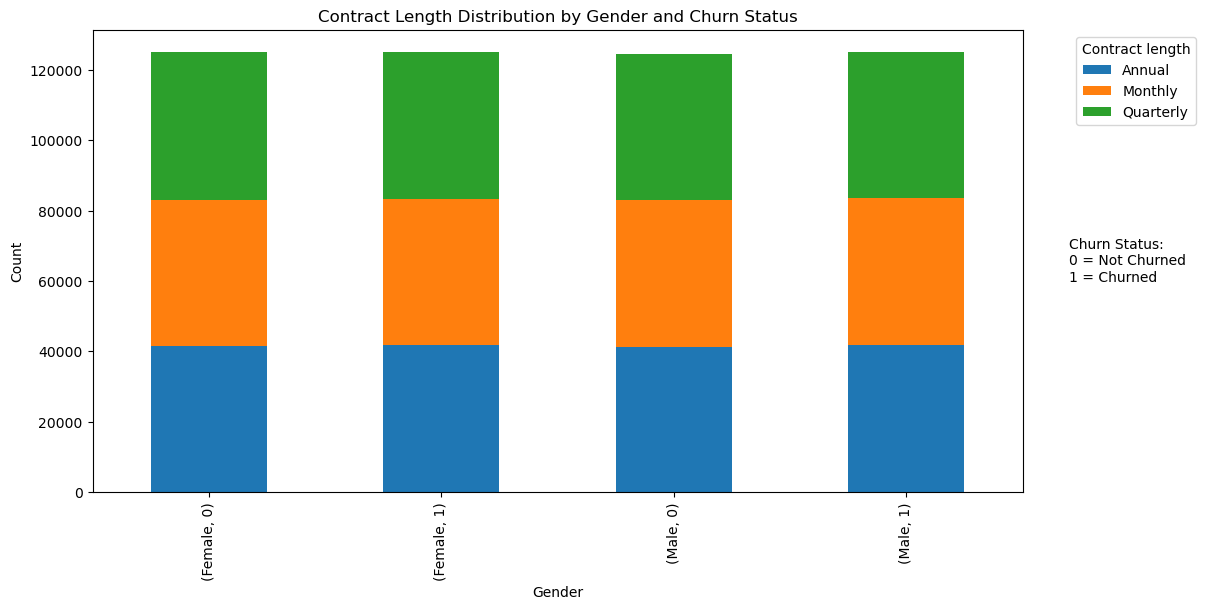

In [26]:
# How does contract length vary by gender and churn status?
contract_length_counts = combined_df.groupby(['Gender', 'Churn'])['Contract Length'].value_counts().unstack(fill_value=0)
contract_length_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Contract Length Distribution by Gender and Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Contract length', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add an additional custom legend to explain 0 = Not Churned, 1 = Churned
plt.text(1.05, 0.5, 'Churn Status:\n0 = Not Churned\n1 = Churned',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='center')

plt.show()

Churn
0    15.031620
1    14.997063
Name: Payment Delay, dtype: float64


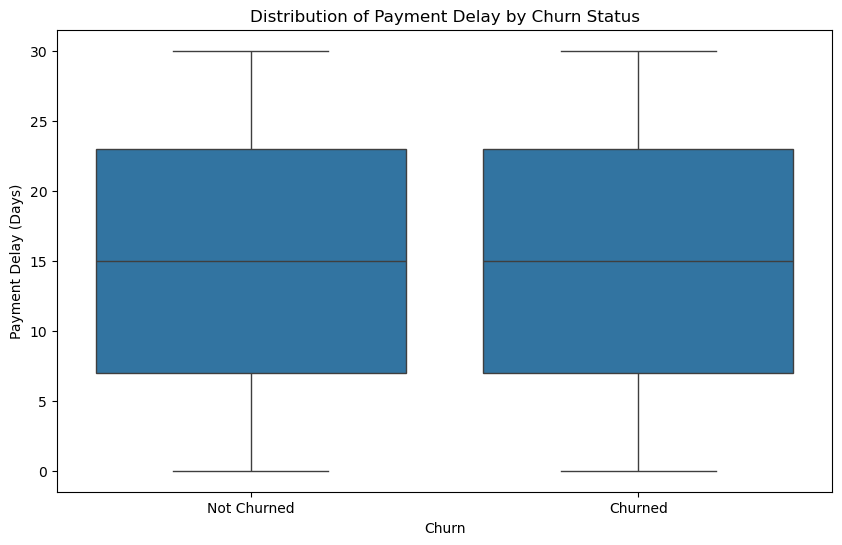

In [27]:
#What is the relationship between payment delay and churn status?
payment_delay_by_churn = combined_df.groupby('Churn')['Payment Delay'].mean()

print(payment_delay_by_churn)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Payment Delay', data=combined_df)
plt.title('Distribution of Payment Delay by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Payment Delay (Days)')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

In [28]:
def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())

    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Cutomer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of cutomer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)

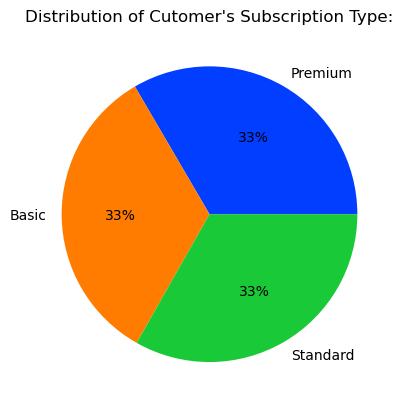

Distribution of cutomer's subscription type:
167082 Premium
166931 Basic
165987 Standard


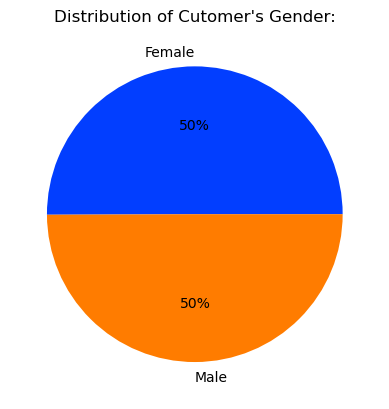

Distribution of cutomer's gender:
250292 Female
249708 Male


In [31]:
make_piechart(combined_df, 'Subscription Type')
make_piechart(combined_df, 'Gender')

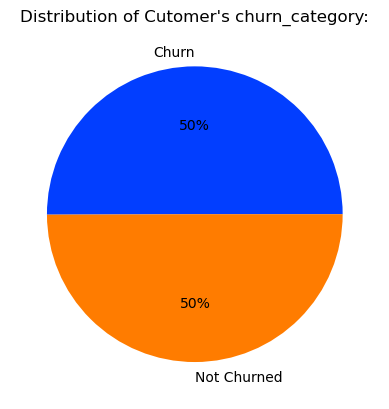

Distribution of cutomer's churn_category:
250254 Churn
249746 Not Churned


In [32]:
# Copying the dataset to a new dataframe
filtered = combined_df.copy()

# Creating a new column for churn category
filtered['churn_category'] = ['Churn' if x == 1 else 'Not Churned' for x in combined_df['Churn']]

# Using the make_piechart function to visualize the churn distribution
make_piechart(filtered, 'churn_category')

Text(0, 0.5, 'Average Churn Rate')

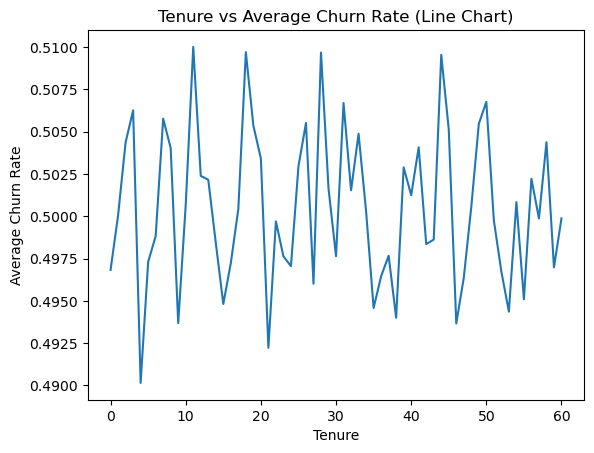

In [33]:
sns.lineplot(data=combined_df, x='Tenure', y='Churn', ci=None)
plt.title('Tenure vs Average Churn Rate (Line Chart)')
plt.xlabel('Tenure')
plt.ylabel('Average Churn Rate')

Text(0, 0.5, 'Average Churn Rate')

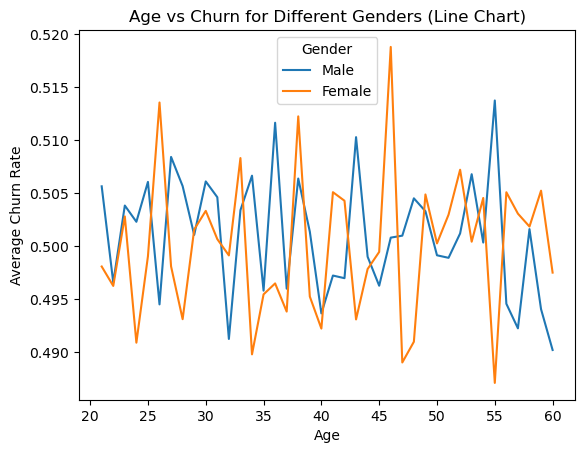

In [34]:
sns.lineplot(data=combined_df, x='Age', y='Churn', hue='Gender', ci=None)
plt.title('Age vs Churn for Different Genders (Line Chart)')
plt.xlabel('Age')
plt.ylabel('Average Churn Rate')

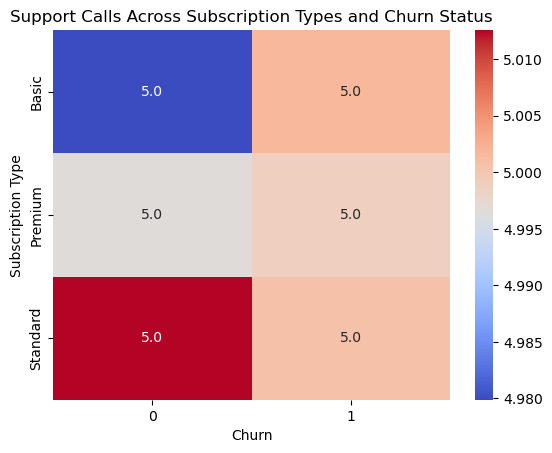

In [35]:
# Create a pivot table for Subscription Type, Churn status, and the average number of Support Calls
heatmap_data = combined_df.pivot_table(index='Subscription Type', columns='Churn', values='Support Calls', aggfunc='mean')

# Plot the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Support Calls Across Subscription Types and Churn Status')
plt.xlabel('Churn')
plt.ylabel('Subscription Type')

plt.show()

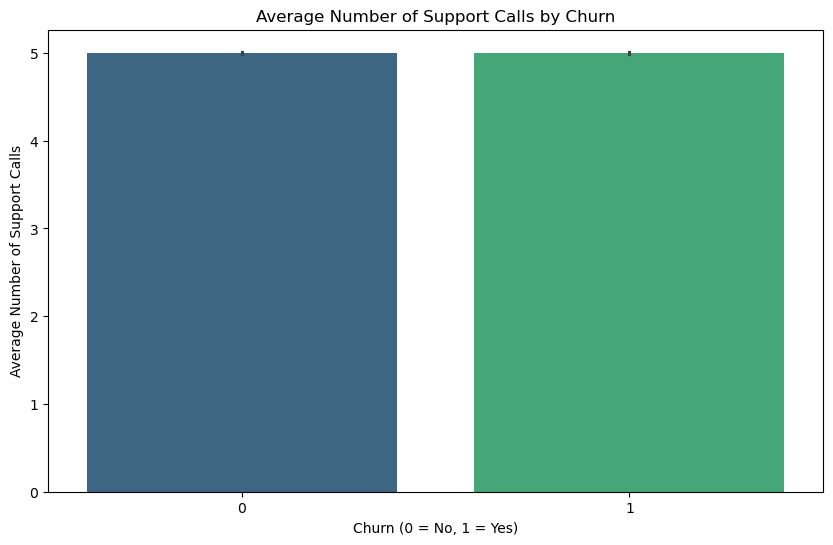

In [36]:
# How does the number of support calls correlate with customer churn?

# Bar chart: Average number of support calls for churned vs non-churned customers
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Churn', y='Support Calls', palette='viridis')
plt.title('Average Number of Support Calls by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Number of Support Calls')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


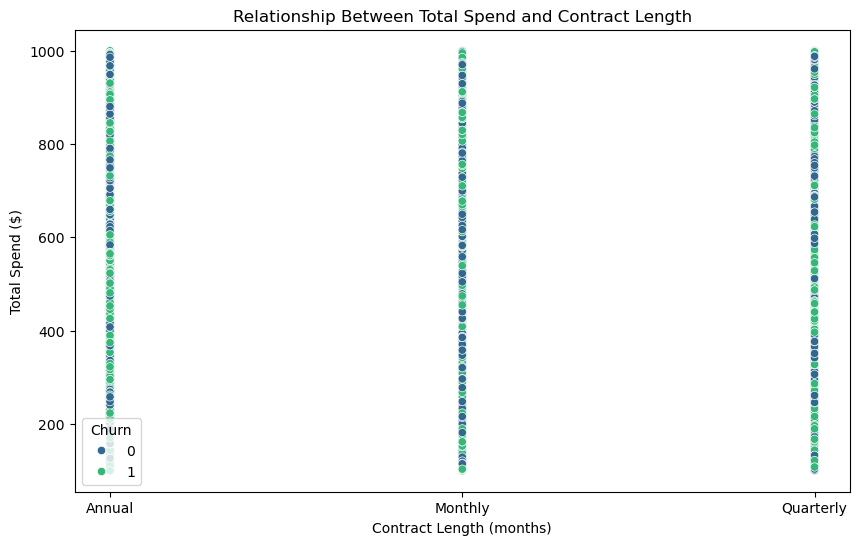

In [37]:
#What is the relationship between total spend and contract length? (Scatter plot)
# Scatter plot: Total Spend vs. Contract Length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Contract Length', y='Total Spend', hue='Churn', palette='viridis')
plt.title('Relationship Between Total Spend and Contract Length')
plt.xlabel('Contract Length (months)')
plt.ylabel('Total Spend ($)')
plt.show()

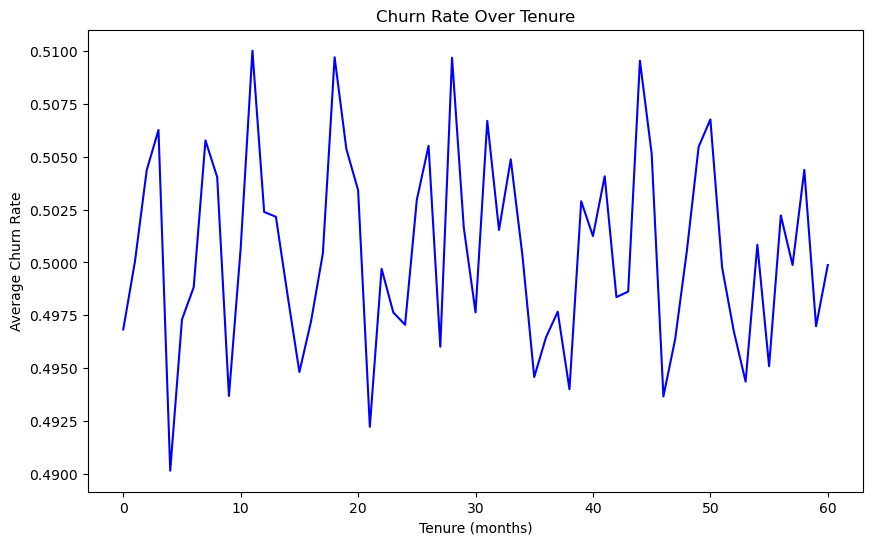

In [38]:
# Is there a trend between tenure and churn over time? (Line chart/Scatter plot)

# Line chart: Average churn rate over tenure periods
avg_churn_by_tenure = combined_df.groupby('Tenure')['Churn'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_churn_by_tenure, color='blue')
plt.title('Churn Rate Over Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Average Churn Rate')
plt.show()

In [39]:
#getting correlation of the numerical cols
cols_num = combined_df.select_dtypes(include=['float64', 'int64'])
cols_num.corr()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
CustomerID,1.000000,-0.000049,-0.000076,-0.000249,-0.000534,-0.001850,-0.000791,-0.000450,-0.000297
Age,-0.000049,1.000000,-0.001076,0.001291,-0.000659,-0.002098,0.002104,0.001533,-0.000668
Tenure,-0.000076,-0.001076,1.000000,0.000743,-0.003054,-0.002036,0.001904,-0.000092,-0.000385
Usage Frequency,-0.000249,0.001291,0.000743,1.000000,0.001703,-0.000247,-0.002474,-0.002095,0.000299
Support Calls,-0.000534,-0.000659,-0.003054,0.001703,1.000000,0.000075,-0.000975,0.001107,0.000649
Payment Delay,-0.001850,-0.002098,-0.002036,-0.000247,0.000075,1.000000,-0.002382,0.000839,-0.001933
Total Spend,-0.000791,0.002104,0.001904,-0.002474,-0.000975,-0.002382,1.000000,0.000660,0.001075
Last Interaction,-0.000450,0.001533,-0.000092,-0.002095,0.001107,0.000839,0.000660,1.000000,0.000829
Churn,-0.000297,-0.000668,-0.000385,0.000299,0.000649,-0.001933,0.001075,0.000829,1.000000


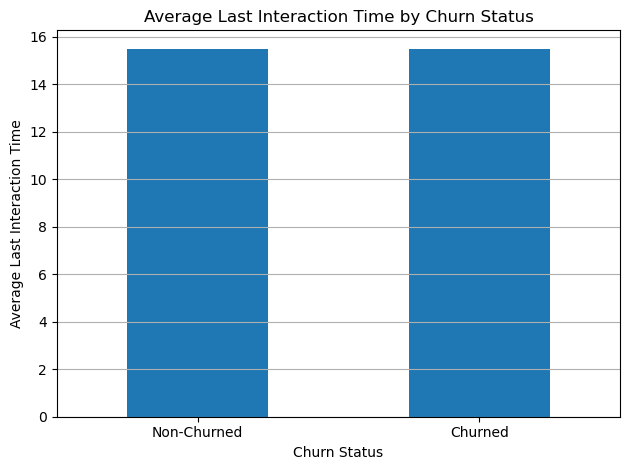

In [40]:
#calculating average interaction based on churn
avg_last_interaction = combined_df.groupby('Churn')['Last Interaction'].mean()


avg_last_interaction.plot(kind='bar')
plt.title('Average Last Interaction Time by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Last Interaction Time')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

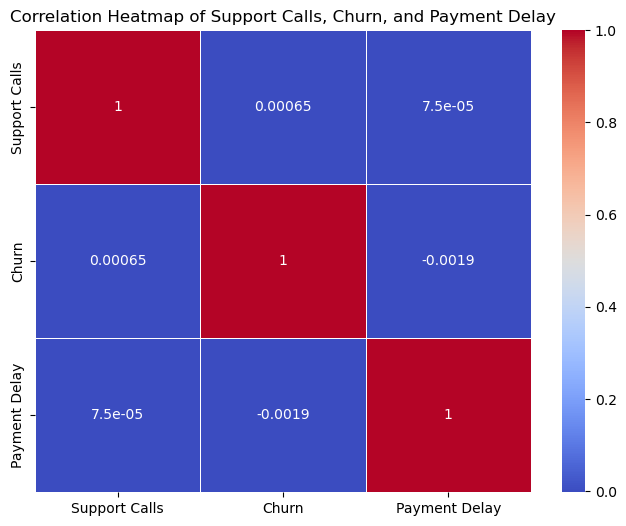

In [41]:
#understanding the relationship between cols by getting the correlation
columns = ['Support Calls', 'Churn', 'Payment Delay']
corr_matrix = combined_df[columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Support Calls, Churn, and Payment Delay')
plt.show()

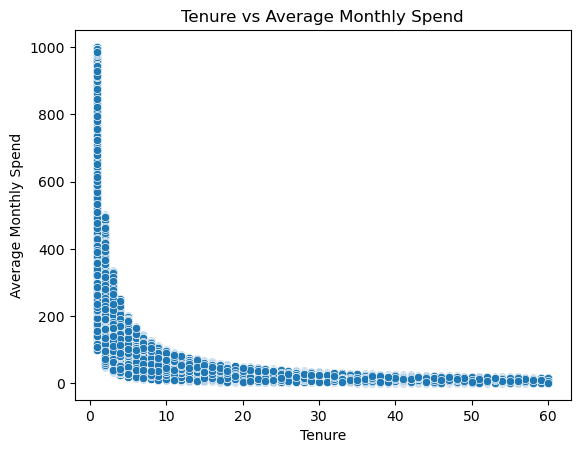

In [42]:
#from this visualize we understand that the increasing of customer tenure , the average monthly spend decreases
combined_df['Average Monthly Spend'] = combined_df['Total Spend'] / combined_df['Tenure']
sns.scatterplot(x='Tenure', y='Average Monthly Spend', data=combined_df.reset_index())
plt.title('Tenure vs Average Monthly Spend')
plt.show()
combined_df.drop('Average Monthly Spend',axis=1,inplace=True)

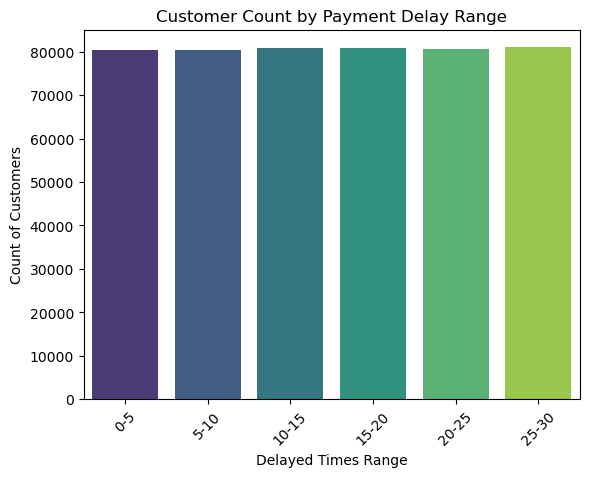

In [43]:
#Visualizing the No. of customer with how many times they delayed their payments
bins = [0, 5, 10,15,20,25,30]
labels = ['0-5', '5-10', '10-15','15-20','20-25','25-30']

combined_df['Payment Delay Range'] = pd.cut(combined_df['Payment Delay'], bins=bins, labels=labels, right=False)
sns.countplot(x='Payment Delay Range', data=combined_df.reset_index(), palette='viridis')

plt.title('Customer Count by Payment Delay Range')
plt.xlabel('Delayed Times Range')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()


combined_df.drop('Payment Delay Range',axis=1,inplace=True)

In [44]:

#Deployment
streamlit_code = """


import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Function to add background image
def add_bg_from_url():
    st.markdown(
        f/"/"/"
        <style>
        .stApp {{
            background-image: url("https://i.pinimg.com/originals/c5/92/cd/c592cd7e5df0bfaa574011387f6e84e4.jpg");
            background-size: cover;
            background-position: center;
            background-attachment: fixed;
        }}
        .title {{
            color: black;
            font-size: 2.5em;
        }}
        .subheader {{
            color: black;
            font-size: 1.5em;
        }}
        </style>
        /"/"/",
        unsafe_allow_html=True
    )
# Apply background image
add_bg_from_url()

# Display dataset on page load
st.markdown('<p class="title">Customer Churn Dashboard</p>', unsafe_allow_html=True)

# Sidebar
st.sidebar.title("Choose Visualization")
options = st.sidebar.selectbox("Select a visualization", [
    "None",  # Default option
    "Contract Length Distribution (Pie Chart)",
    "Data Distribution (Histogram)",
    "3D Scatter Plot (Age, Total Spend, and Churn)",
    "K-Means Clustering (Tenure vs Total Spend)",
    "Subscription Type & Contract Length (Bar Plot)",
    "Total Spend by Gender & Churn (Box Plot)",
    "Contract Length by Gender & Churn (Bar Plot)",
    "Payment Delay by Churn Status (Box Plot)",
    "Subscription Type Pie Chart",
    "Churn Category Pie Chart",
    "Churn Distribution (Pie Chart)",
    "Tenure vs Churn Rate (Line Chart)",
    "Age vs Churn (Line Chart)",
    "Support Calls by Subscription Type and Churn Status",
    "Average Support Calls by Churn Status",
    "Total Spend vs. Contract Length (Scatter Plot)",
    "Churn Over Tenure (Line Chart)",
    "Average Last Interaction by Churn Status",
    "Correlation Heatmap (Support Calls, Churn, Payment Delay)",
    "Payment Delay Range (Customer Count)"
],
index=0
)

# Visualizations based on sidebar selection
if options == "None":
    st.markdown('<p class="subheader">Please select a visualization from the dropdown menu</p>', unsafe_allow_html=True)
elif options == "Contract Length Distribution (Pie Chart)":
    contract_length_counts = combained_df['Contract Length'].value_counts()
    fig, ax = plt.subplots()
    ax.pie(contract_length_counts, labels=contract_length_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'orange'])
    ax.set_title('Contract Length Distribution')
    st.pyplot(fig)

elif options == "Data Distribution (Histogram)":
    fig, ax = plt.subplots(figsize=(10, 8))
    combined_df.hist(ax=ax, edgecolor='black')
    plt.tight_layout()
    st.pyplot(fig)

elif options == "3D Scatter Plot (Age, Total Spend, and Churn)":
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x = combined_df['Age']
    y = combined_df['Total Spend']
    z = combined_df['Churn']
    scatter = ax.scatter(x, y, z, c=z, cmap='coolwarm', marker='o')
    ax.set_xlabel('Age')
    ax.set_ylabel('Total Spend')
    ax.set_zlabel('Churn (0 or 1)')
    plt.title('3D Scatter Plot of Age, Total Spend, and Churn')
    fig.colorbar(scatter, ax=ax, label='Churn (0 = No, 1 = Yes)')
    st.pyplot(fig)

elif options == "K-Means Clustering (Tenure vs Total Spend)":
    # Handle missing values by dropping rows with NaNs
    X = combined_df[['Tenure', 'Total Spend']].dropna()
    kmeans = KMeans(n_clusters=3, random_state=0)
    combined_df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X)

    fig, ax = plt.subplots()
    sns.scatterplot(x='Tenure', y='Total Spend', hue='Cluster', data=combained_df, palette='viridis', s=100, ax=ax)
    ax.set_title('Customer Segments Based on Tenure and Total Spend')
    st.pyplot(fig)

elif options == "Subscription Type & Contract Length (Bar Plot)":
    fig, ax = plt.subplots()
    sns.countplot(x='Subscription Type', hue='Contract Length', data=combained_df, palette='Set2', ax=ax)
    ax.set_title('Subscription Type & Contract Length')
    st.pyplot(fig)

elif options == "Total Spend by Gender & Churn (Box Plot)":
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='Gender', y='Total Spend', hue='Churn', data=combained_df, ax=ax)
    ax.set_title('Distribution of Total Spend by Gender and Churn Status')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Total Spend')
    ax.legend(title='Churn Status', labels=['0 (Not Churned)', '1 (Churned)'], loc='upper right')
    st.pyplot(fig)

elif options == "Contract Length by Gender & Churn (Bar Plot)":
    contract_length_counts = combained_df.groupby(['Gender', 'Churn'])['Contract Length'].value_counts().unstack(fill_value=0)
    fig, ax = plt.subplots(figsize=(12, 6))
    contract_length_counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title('Contract Length Distribution by Gender and Churn Status')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.legend(title='Contract Length', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.text(1.05, 0.5, 'Churn Status: 0 = Not Churned 1 = Churned',
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='center')
    st.pyplot(fig)

elif options == "Payment Delay by Churn Status (Box Plot)":
    payment_delay_by_churn = combained_df.groupby('Churn')['Payment Delay'].mean()
    st.write(payment_delay_by_churn)  # Display the mean payment delay
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x='Churn', y='Payment Delay', data=combained_df, ax=ax)
    ax.set_title('Distribution of Payment Delay by Churn Status')
    ax.set_xlabel('Churn')
    ax.set_ylabel('Payment Delay (Days)')
    ax.set_xticklabels(['Not Churned', 'Churned'])
    st.pyplot(fig)


elif options == "Subscription Type Pie Chart":
    subscription_type_counts = combined_df['Subscription Type'].value_counts()
    fig, ax = plt.subplots()
    ax.pie(subscription_type_counts, labels=subscription_type_counts.index, autopct='%1.1f%%')
    ax.set_title('Subscription Type Distribution')
    st.pyplot(fig)

elif options == "Churn Category Pie Chart":
    churn_category_counts = combined_df['Churn'].value_counts()
    fig, ax = plt.subplots()
    ax.pie(churn_category_counts, labels=churn_category_counts.index, autopct='%1.1f%%')
    ax.set_title('Churn Category Distribution')
    st.pyplot(fig)

elif options == "Churn Distribution (Pie Chart)":
    filtered = combined_df.copy()
    filtered['churn_category'] = ['Churn' if x == 1 else 'Not Churned' for x in filtered['Churn']]
    dict_of_val_counts = dict(filtered['churn_category'].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title("Distribution of Customer's Churn Status:")
    plt.axis('equal')  # Ensures the pie chart is circular
    st.pyplot(plt)  # This line will render the plot in Streamlit

elif options == "Tenure vs Churn Rate (Line Chart)":
    fig, ax = plt.subplots()
    sns.lineplot(x='Tenure', y='Churn', data=combined_df, ax=ax)
    ax.set_title('Tenure vs Churn Rate')
    st.pyplot(fig)

elif options == "Age vs Churn (Line Chart)":
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(data=combined_df, x='Age', y='Churn', hue='Gender', ci=None, ax=ax)
    ax.set_title('Age vs Churn for Different Genders (Line Chart)')
    ax.set_xlabel('Age')
    ax.set_ylabel('Average Churn Rate')
    st.pyplot(fig)

elif options == "Support Calls by Subscription Type and Churn Status":
    # Create a pivot table for Subscription Type, Churn status, and the average number of Support Calls
    heatmap_data = combined_df.pivot_table(index='Subscription Type', columns='Churn', values='Support Calls', aggfunc='mean')
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
    plt.title('Support Calls Across Subscription Types and Churn Status')
    plt.xlabel('Churn Status')
    plt.ylabel('Subscription Type')
    plt.tight_layout()
    st.pyplot(plt)

elif options == "Average Support Calls by Churn Status":
    plt.figure(figsize=(10, 6))
    sns.barplot(data=combained_df, x='Churn', y='Support Calls', palette='viridis')
    plt.title('Average Number of Support Calls by Churn Status')
    plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
    plt.ylabel('Average Number of Support Calls')
    plt.tight_layout()

    st.pyplot(plt)

elif options == "Total Spend vs. Contract Length (Scatter Plot)":
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=combined_df, x='Contract Length', y='Total Spend', hue='Churn', palette='viridis', ax=ax)
    ax.set_title('Relationship Between Total Spend and Contract Length')
    ax.set_xlabel('Contract Length (months)')
    ax.set_ylabel('Total Spend ($)')
    st.pyplot(fig)

elif options == "Churn Over Tenure (Line Chart)":
    fig, ax = plt.subplots()
    sns.lineplot(x='Tenure', y='Churn', data=combined_df, ax=ax)
    ax.set_title('Churn Over Tenure')
    st.pyplot(fig)

elif options == "Average Last Interaction by Churn Status":
    # Calculating the average of the 'Last Interaction' by 'Churn' status
    avg_last_interaction = combined_df.groupby('Churn')['Last Interaction'].mean()
    avg_last_interaction.plot(kind='bar')
    plt.title('Average Last Interaction Time by Churn Status')
    plt.xlabel('Churn Status')
    plt.ylabel('Average Last Interaction Time')
    plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'], rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    st.pyplot(plt)

elif options == "Correlation Heatmap (Support Calls, Churn, Payment Delay)":
    fig, ax = plt.subplots()
    sns.heatmap(combined_df[['Support Calls', 'Churn', 'Payment Delay']].corr(), annot=True, cmap='coolwarm', ax=ax)
    ax.set_title('Correlation Heatmap')
    st.pyplot(fig)

elif options == "Payment Delay Range (Customer Count)":
    bins = [0, 5, 10, 15, 20, 25, 30]
    labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
    combined_df['Payment Delay Range'] = pd.cut(combined_df['Payment Delay'], bins=bins, labels=labels, right=False)
    sns.countplot(x='Payment Delay Range', data=combined_df.reset_index(), palette='viridis')
    plt.title('Customer Count by Payment Delay Range')
    plt.xlabel('Delayed Times Range')
    plt.ylabel('Count of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    st.pyplot(plt)
    combined_df.drop('Payment Delay Range', axis=1, inplace=True)

# Button to show dataset description
if st.sidebar.button('Show Dataset Description'):
    st.subheader('Dataset Description')
    st.write(combained_df.describe())

# Option to show the dataset
if st.sidebar.checkbox('Show Dataset',value=True):
    st.subheader('Dataset')
    st.write(combained_df)


# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

# Load dataset
file_path = 'merged_customer_churn.csv'  # Path to your uploaded dataset
combined_df = pd.read_csv(file_path)
combined_df = combined_df.dropna()

# Preprocessing for prediction (simple example)
# Encoding Subscription Type manually (Basic=0, Standard=1, Premium=2)
subscription_type_mapping = {'Basic': 0, 'Standard': 1, 'Premium': 2}

# Encoding Contract Length manually (Annually=12, Quarterly=3, Monthly=1)
contract_length_mapping = {'Annually': 12, 'Quarterly': 3, 'Monthly': 1}

# Features and target
X = combined_df[['Usage Frequency', 'Support Calls', 'Payment Delay',
                  'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']]

# Encode Subscription Type and Contract Length for model training
X['Subscription Type'] = X['Subscription Type'].map(subscription_type_mapping)
X['Contract Length'] = X['Contract Length'].map(contract_length_mapping)
y = combained_df['Churn']

label_encoder = LabelEncoder()
combined_df['Subscription Type'] = label_encoder.fit_transform(combined_df['Subscription Type'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier model
model = HistGradientBoostingClassifier()

# Fit the model
model.fit(X, y)

# Sidebar - Prediction option
st.sidebar.title("Predict Churn")

# Show input fields for user
st.sidebar.subheader("Input Customer Data:")
usage_frequency = st.sidebar.number_input('Usage Frequency', min_value=0, max_value=100, value=10)
support_calls = st.sidebar.number_input('Support Calls', min_value=0, max_value=100, value=5)
payment_delay = st.sidebar.number_input('Payment Delay (days)', min_value=0, max_value=365, value=0)

# Dropdown for Subscription Type
subscription_type = st.sidebar.selectbox("Subscription Type", ['Basic', 'Standard', 'Premium'])

# Dropdown for Contract Length
contract_length = st.sidebar.selectbox("Contract Length", ['Annually', 'Quarterly', 'Monthly'])

total_spend = st.sidebar.number_input('Total Spend ($)', min_value=0.0, value=1000.0)
last_interaction = st.sidebar.number_input('Last Interaction (days ago)', min_value=0, max_value=365, value=30)

if st.sidebar.button('Predict Churn'):

    # Map the user input for Subscription Type and Contract Length
    subscription_type_encoded = subscription_type_mapping[subscription_type]
    contract_length_encoded = contract_length_mapping[contract_length]

    # Collect input data into an array
    input_data = np.array([[usage_frequency, support_calls, payment_delay,
                            subscription_type_encoded, contract_length_encoded,
                            total_spend, last_interaction]])

    prediction = model.predict(input_data)

    # Display prediction result
    if prediction[0] == 1:
        st.sidebar.success('The customer is likely to **churn**.')
    else:
        st.sidebar.success('The customer is likely to **stay**.')

"""

with open('Customer_Churn_Streamlit.py', 'w') as f:
    f.write(streamlit_code)

print("Streamlit code saved to 'app.py'")

Streamlit code saved to 'app.py'


In [59]:
#install streamlit
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


In [57]:
#install local tunnel
!pip install localtunnel

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel


In [49]:
pip install py-localtunnel

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [50]:
#IP of localtunnel

In [71]:
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))


Password/Enpoint IP for localtunnel is: 197.62.46.215


In [64]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com


& was unexpected at this time.


In [65]:
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 197.62.46.215


In [70]:
#Machine Learning 


& was unexpected at this time.


In [72]:
from sklearn.preprocessing import LabelEncoder
combined_df['Gender'] = LabelEncoder().fit_transform(combined_df['Gender'])
combined_df['Subscription Type'] = LabelEncoder().fit_transform(combined_df['Subscription Type'])
combined_df['Contract Length'] = LabelEncoder().fit_transform(combined_df['Contract Length'])
combined_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Cluster,Frequent Support Calls
0,1,32,1,46,7,3,7,2,0,289.81,25,1,2,False
1,2,25,1,40,9,2,11,2,0,748.27,24,0,1,False
2,3,56,1,1,16,4,7,0,0,646.24,8,0,0,False
3,4,22,0,43,18,2,18,1,1,645.70,30,1,0,False
4,5,30,1,11,20,5,27,0,2,241.48,4,1,2,False


In [73]:
# Feature Selection
#selecting best features for the target using f_classif method
from sklearn.feature_selection import SelectKBest, f_classif
X = combined_df.drop('Churn',axis =1)
y = combined_df['Churn']
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Get feature scores
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print the feature scores
print(feature_scores)

                   Feature     Score
8          Contract Length  2.718348
6            Payment Delay  1.867813
2                   Gender  0.601909
9              Total Spend  0.577328
10        Last Interaction  0.343388
12  Frequent Support Calls  0.255624
1                      Age  0.222908
5            Support Calls  0.210658
7        Subscription Type  0.131258
3                   Tenure  0.074053
11                 Cluster  0.054939
4          Usage Frequency  0.044752
0               CustomerID  0.044027


In [75]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Impute missing values in your feature dataset X
imputer = SimpleImputer(strategy='mean')  # or 'median' depending on the data
X_imputed = imputer.fit_transform(X)

# If y has no missing values
y_imputed = y  # Use this if y doesn't need imputation


# Select the top features based on scores
top_features = feature_scores['Feature'].head(4).values  # Adjust the number as needed

# Get the indices of the top features in your dataset
top_feature_indices = [list(feature_scores['Feature']).index(feature) for feature in top_features]
X_top_imputed = X_imputed[:, top_feature_indices]  # Select only the columns corresponding to top features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

Accuracy: 0.49832

Confusion Matrix:
 [[25438 24314]
 [25854 24394]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50     49752
           1       0.50      0.49      0.49     50248

    accuracy                           0.50    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.50      0.50      0.50    100000

ROC AUC Score: 0.50


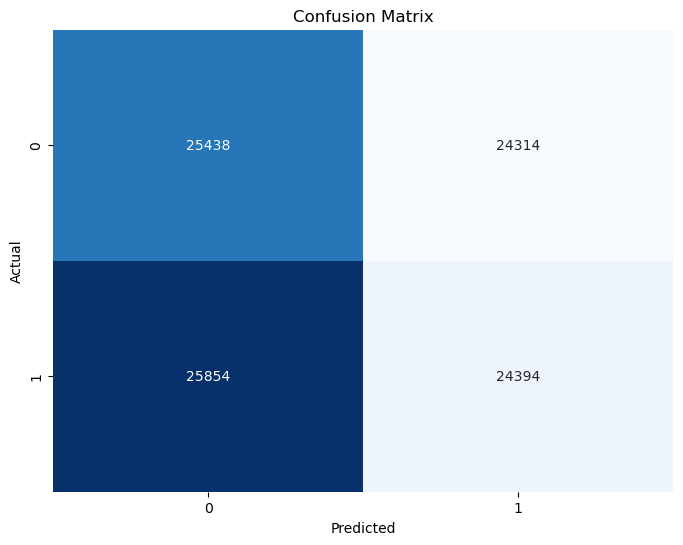

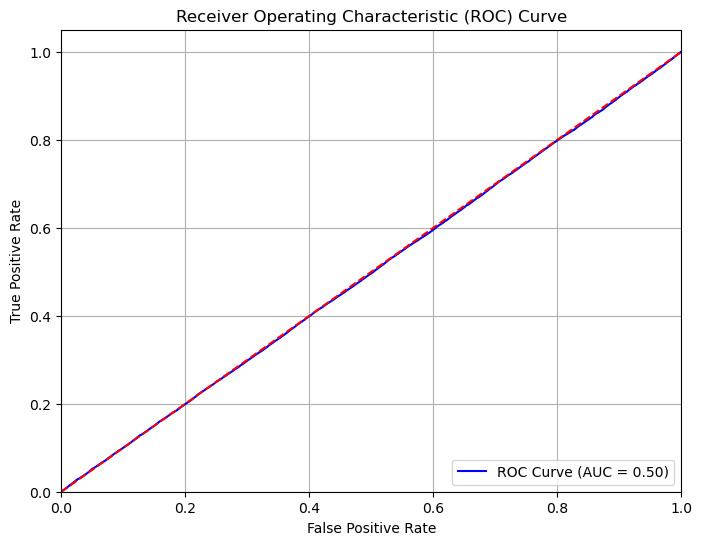

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print("\nClassification Report:\n", class_report)
# Calculate and print the ROC AUC Score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# For ROC AUC, we need the predicted probabilities
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [23]:

import lightgbm as lgb
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Assuming combained_df is your DataFrame
# Step 1: Define features and target variable
X = combined_df.drop('Churn', axis=1)
y = combined_df['Churn']

# Step 2: Drop NaN values from both features and target
X = X[y.notna()]
y = y.dropna()  # Drop NaN values from the target

# Step 3: Impute missing values in the features
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
X_imputed = imputer.fit_transform(X)

# Step 4: Split the cleaned dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 5: Use a decision stump as the weak learner
base_learner = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost classifier with 50 estimators
ada_model = AdaBoostClassifier(estimator=base_learner, n_estimators=50, learning_rate=1.0, random_state=42)

# Fit the model
ada_model.fit(X_train, y_train)

# Step 6: Calculate accuracy for the training set
training_accuracy = ada_model.score(X_train, y_train)

# Print the training accuracy
print(f"Training Accuracy: {training_accuracy:.2f}")

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Male'

In [22]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (if needed, for classification)
# If you need probabilities: y_pred = model.predict_proba(X_test)[:, 1]
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Display a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# Plot feature importance
lgb.plot_importance(model, max_num_features=10)
plt.show()

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Gender: object, Subscription Type: object, Contract Length: object